In [42]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

data = np.genfromtxt('/Users/yjeonlee/Desktop/[DS-GA-1001]Intro to Data Science/Project3/movieReplicationSet.csv',  delimiter = ',',  skip_header = 1)
print(data.shape)

(1097, 477)


In [43]:
selected = data[:, 421:475]
print(selected.shape)

(1097, 54)


In [44]:
colMedian = np.nanmedian(selected, axis=0)
print("columns median", colMedian)

indices = np.where(np.isnan(selected))
#print("indices:", indices)
selected[indices] = np.take(colMedian, indices[1])
print("final", selected)

# # column mean
# col_mean = np.nanmean(ini_array, axis = 0)
  
# # printing column mean
# print ("columns mean", str(col_mean))
  
# # find indices where nan value is present
# inds = np.where(np.isnan(ini_array))
  
# # replace inds with avg of column
# ini_array[inds] = np.take(col_mean, inds[1])
  
# # printing final array
# print ("final array", ini_array)

columns median [3. 4. 3. 4. 4. 4. 4. 3. 4. 3. 2. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 3. 3. 3.
 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 3. 4. 4. 4. 4. 3. 3. 3. 3.
 2. 5. 4. 3. 2. 1.]
final [[2. 4. 4. ... 5. 1. 1.]
 [3. 4. 1. ... 3. 2. 1.]
 [2. 4. 2. ... 4. 4. 1.]
 ...
 [2. 5. 4. ... 4. 2. 1.]
 [2. 4. 3. ... 3. 1. 1.]
 [4. 5. 2. ... 4. 1. 1.]]


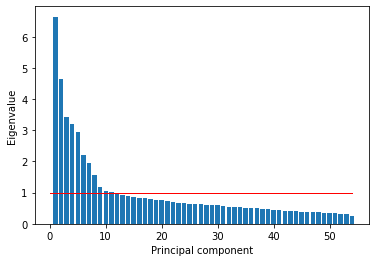

In [45]:
#filledData = np.where(np.isnan(selected), ma.array(selected, mask=np.isnan(selected)).median(axis=0), selected)
filledData = selected

zscoredData = stats.zscore(filledData)

pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_
rotatedData = pca.fit_transform(zscoredData)
covarExplained = eigVals/sum(eigVals)*100

numClasses = 54
plt.bar(np.linspace(1,54,54),eigVals)
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.plot([0,numClasses],[1,1],color='red',linewidth=1) # Kaiser criterion line

Text(0, 0.5, 'Loading')

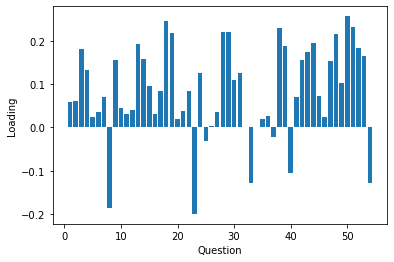

In [46]:
whichPrincipalComponent = 1 # Try a few possibilities (at least 1,2,3 - or 0,1,2 that is - indexing from 0)

# 1: The first one accounts for almost everything, so it will probably point 
# in all directions at once
# 2: Challenging/informative - how much information?
# 3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?

plt.bar(np.linspace(1,54,54),loadings[whichPrincipalComponent,:]*-1)
plt.xlabel('Question')
plt.ylabel('Loading')


Text(0, 0.5, 'Hardness of course')

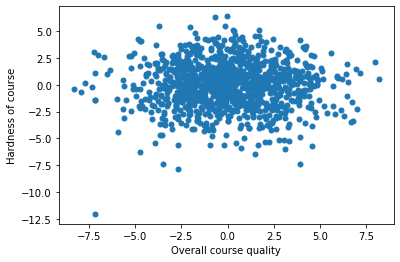

In [47]:
plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5)
plt.xlabel('Overall course quality')
plt.ylabel('Hardness of course')
